In [2]:
include("../code/optimal_cycle.jl")
include("../code/bp_full_gfq.jl")

fix_indep! (generic function with 2 methods)

# RS

In [10]:
include("../code/rs.jl")
k = 100
K = [fill(0,k); 1];
Λ = [0, 1]
J = 100
R, D, p, q = RS(K, Λ, N=J, tol=1e-12)

Fia = -2.0026182842883045
Fi = 1.0042207856008325
Fa = 0.0
O = 0.998397498687472


(0.9801980198019802, 0.0008012506562640187, [1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7  …  1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7, 1.3214626312232611e-7], [1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7  …  1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7, 1.3214626312232614e-7])

In [12]:
bins = -5:5
[p[bins] q[bins]]

11×2 Matrix{Float64}:
 1.41959e-7  1.47627e-7
 1.59643e-7  1.75175e-7
 2.0839e-7   2.50689e-7
 3.41736e-7  0.0141535
 0.0283067   0.47168
 0.94336     0.0283067
 0.0283067   0.47168
 3.41736e-7  0.0141535
 2.0839e-7   2.50689e-7
 1.59643e-7  1.75175e-7
 1.41959e-7  1.47627e-7

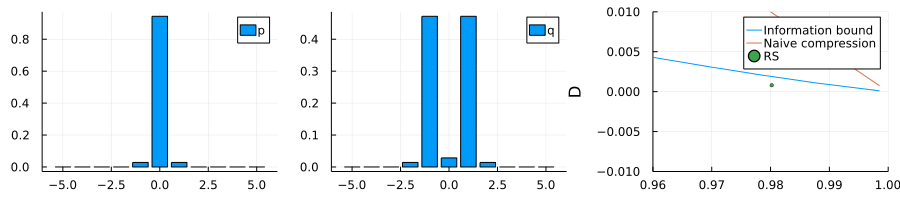

In [29]:
using Plots
p1 = bar(bins, p[bins], label="p")
p2 = bar(bins, q[bins], label="q")
p3 = plot_rdb(f30=false)
scatter!(p3, [R], [D], ms=2, label="RS", xlims=(0.96,1), ylims=(-0.01,0.01))
plot(p1, p2, p3, size=(900,200), layout=(1,3))

In [46]:
const Q=2
n = 300
R = 0.86
H = Bool.(cycle_code(Q, n, R; rng=MersenneTwister(5), maxtrials=10^4, verbose=true))
s = rand((-1,1), n);

Factor graph generated after 406 trials


In [49]:
ener, ovl, σ = findsol(H, s)

Iter 1. Overlap -0.3467. Cycle weight -84.0. Energy shift -84
Iter 2. Overlap -0.6. Cycle weight -76.0. Energy shift -76
Iter 3. Overlap -0.7867. Cycle weight -56.0. Energy shift -56
Iter 4. Overlap -0.8733. Cycle weight -26.0. Energy shift -26
Iter 5. Overlap -0.9. Cycle weight -8.0. Energy shift -8
Iter 6. Overlap -0.9133. Cycle weight -4.0. Energy shift -4
Iter 7. Overlap -0.9133. Cycle weight 0.0. Energy shift 0


(0.9133333333333333, [0.3466666666666667, 0.6, 0.7866666666666666, 0.8733333333333333, 0.9, 0.9133333333333333, 0.9133333333333333, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [-1, 1, 1, -1, 1, -1, -1, 1, 1, -1  …  1, -1, 1, -1, 1, -1, 1, 1, 1, -1])

In [55]:
D = mean(σ .!= s)

0.043333333333333335

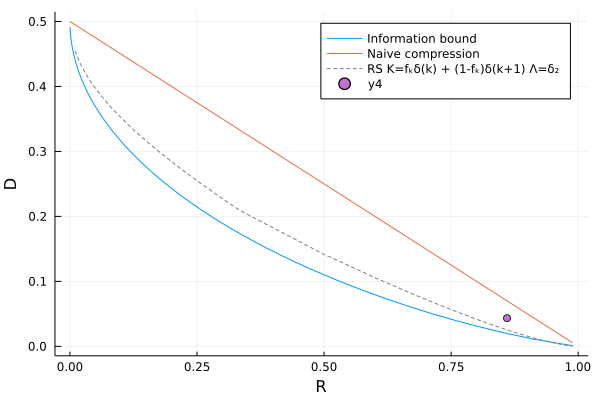

In [56]:
plot_rdb()
scatter!([R], [D])

In [189]:
ns = [2400,9600,9600*4,9600*16,9600*16*4]
Rs = 0.55:0.02:0.9
Rs = [0.9]
N = length(ns)
Nr = length(Rs)
navg = [40*16*4, 40*16, 40*4, 40, 10]
ds = [[fill(0.0,navg[i]) for _ in 1:Nr] for i in 1:N];
ns

5-element Vector{Int64}:
   2400
   9600
  38400
 153600
 614400

In [184]:
for (j,R) in enumerate(Rs)
    for (i,n) in enumerate(ns)
        H = Bool.(cycle_code(Q, n, R; maxtrials=5*10^4, verbose=false))
        prog = Progress(navg[i])
        Threads.@threads for k in 1:navg[i]
            s = rand((-1,1), n)
            ener, ovl, σ = findsol(H, s, verbose=false)
            ds[i][j][k] = mean(σ .!= s)
            next!(prog)
        end
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


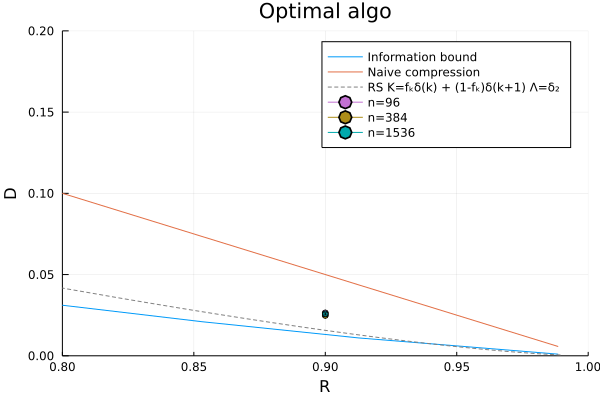

In [185]:
p = plot_rdb()
for (i,n) in enumerate(ns)
    plot!(p, Rs, mean.(ds[i]), yerr=std.(ds[i])/sqrt(navg[i]), label="n=$n", ms=3, m=:o)
end
xlims!((Rs[1]-0.1, Rs[end]+0.1)); ylims!((0,0.2))
title!("Optimal algo")
p

In [186]:
D = [ds[i][end] for i in eachindex(ns)]
R_f30 = 0.01:0.01:0.99
D_f30 = [0.4546474073128681,0.43565049932361133,0.42092765046912317,0.40839439222208573,0.3972457420215144,0.3870702443196218,0.3776242651788484,0.36874955806591975,0.3603365352601175,0.3523056385673838,0.34459697668198624,0.33716414626734653,0.3299703418625086,0.3229857971761951,0.31618604029437997,0.30955066735206993,0.30306245811343413,0.2967067238049428,0.2904708168067388,0.2843437556958753,0.2783159341345032,0.27237889177802405,0.26652513178257226,0.2607479738209666,0.2550414345013817,0.24940012917780852,0.2438191906350483,0.2382942012118009,0.2328211357178961,0.22739631308980668,0.22201635516998064,0.21667815133009227,0.211378827914124,0.20688352899753953,0.20278317659003975,0.19868817793711935,0.1945975994415784,0.19051056552023182,0.18642625421128822,0.18234389327612,0.17826275673045133,0.17418216174918932,0.17010146589683228,0.16602006464188257,0.16193738911916555,0.15785290410864755,0.1537661062033548,0.14967652214243293,0.1455837072883871,0.14148724423013948,0.137998366107847,0.13448740638286893,0.13095421069018287,0.12739865696194796,0.12382065470933767,0.12022014422138577,0.11659709568295457,0.1129515082152911,0.10928340884389087,0.10559285139949881,0.10231362606715677,0.0989986151678956,0.09564794614910743,0.0922617930523803,0.0888403753926773,0.08538395674018595,0.0820151560863665,0.0788488704133426,0.07563678673548502,0.07237911796887381,0.06907615625262697,0.06591319349557895,0.06283584277258297,0.05970319879491964,0.056515457092013055,0.053562785457060835,0.05054512262289507,0.04752198628196386,0.04463641809759822,0.04167585667427448,0.0388827836051418,0.03604608454052277,0.033304960430999175,0.03060809220840449,0.027952952887639493,0.025359146185103376,0.022832861932172044,0.020370784947590925,0.017979055383501308,0.015666129177374533,0.013449978144655372,0.0113201258591068,0.009302254807509736,0.007397829094439923,0.0056264302423451595,0.004010648891537405,0.002577264143732827,0.0013672330158682189,0.0004509986577261871]
D_RS = D_f30[90]

0.015666129177374533

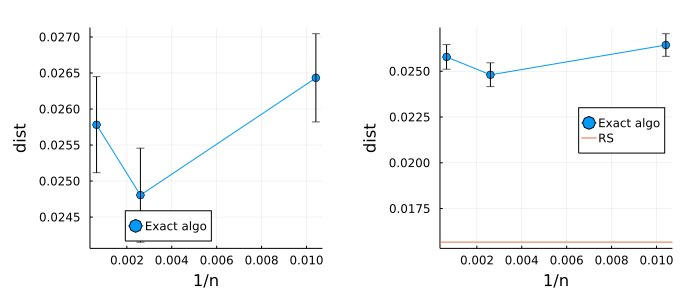

In [188]:
p1 = plot(1 ./ns, mean.(D), yerr=std.(D)./sqrt.(navg), m=:o, label="Exact algo", legend=:bottom)
xlabel!("1/n"); ylabel!("dist")
p2 = deepcopy(p1)
hline!(p2, [D_RS], label="RS", legend=:right)
plot(p1,p2, size=(700,300), margin=5Plots.mm)